 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
# Reading whale returns
whale_returns_csv = Path("whale_returns.csv")
whalereturns_pd = pd.read_csv(whale_returns_csv,index_col="Date", parse_dates=True)
whalereturns_pd.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whalereturns_pd.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whalereturns_pd.dropna(inplace=True)
whalereturns_pd.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [5]:
# Reading algorithmic returns
algo_returns_csv = Path("algo_returns.csv")
algoreturns_pd = pd.read_csv(algo_returns_csv,index_col="Date", parse_dates=True)
algoreturns_pd.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algoreturns_pd.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algoreturns_pd.dropna(inplace=True)
algoreturns_pd.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_history_csv = Path("sp_tsx_history.csv")
sp60_pd = pd.read_csv(sp_tsx_history_csv,index_col="Date", parse_dates=True)
sp60_pd.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [9]:
# Check Data Types
sp60_pd.info()
sp60_pd.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1818 entries, 2012-10-01 to 2019-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Close   1818 non-null   object
dtypes: object(1)
memory usage: 28.4+ KB


,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [10]:
# Fix Data Types
sp60_pd["Close"] = sp60_pd["Close"].str.replace('$','')
sp60_pd.head()

C:\Users\Sargun\AppData\Local\Temp\ipykernel_10232\2568945853.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp60_pd["Close"] = sp60_pd["Close"].str.replace('$','')


,Close
Date,
2012-10-01,"12,370.19"
2012-10-02,"12,391.23"
2012-10-03,"12,359.47"
2012-10-04,"12,447.68"
2012-10-05,"12,418.99"


In [13]:
sp60_pd['Close'] = sp60_pd['Close'].str.replace(',', "")
print(sp60_pd)

               Close
Date                
2012-10-01  12370.19
2012-10-02  12391.23
2012-10-03  12359.47
2012-10-04  12447.68
2012-10-05  12418.99
...              ...
2019-12-20  17118.44
2019-12-23  17128.71
2019-12-24  17180.15
2019-12-27  17168.21
2019-12-30  17098.56

[1818 rows x 1 columns]


In [15]:
# Calculate Daily Returns
sp60_pd["Close"] = sp60_pd["Close"].astype('float64')
sp60_pd.info()
sp60_pd["Close"] = sp60_pd["Close"].pct_change()
sp60_pd.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1818 entries, 2012-10-01 to 2019-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1818 non-null   float64
dtypes: float64(1)
memory usage: 28.4 KB


,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [16]:
# Drop nulls
sp60_pd.dropna(inplace=True)
sp60_pd.isnull().sum()

Close    0
dtype: int64

In [17]:
# Rename `Close` Column to be specific to this portfolio.
sp60_pd.columns = ["S&P TSX 60"]
sp60_pd.head()

,S&P TSX 60
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [18]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns = pd.concat([whalereturns_pd,algoreturns_pd,sp60_pd], axis="columns", join="inner")
combined_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns of All Portfolios'}, xlabel='Date'>

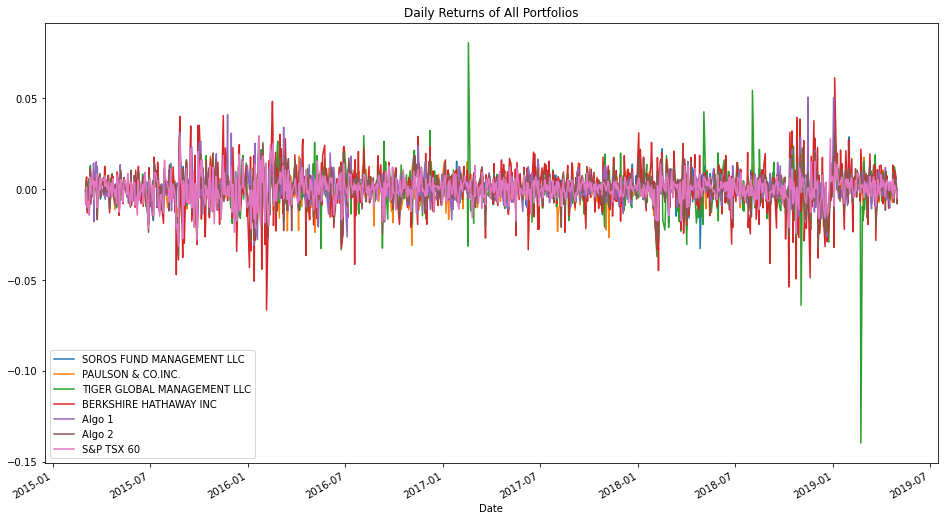

In [19]:
# Plot daily returns of all portfolios
combined_returns.plot(figsize=(16,9), title="Daily Returns of All Portfolios")

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

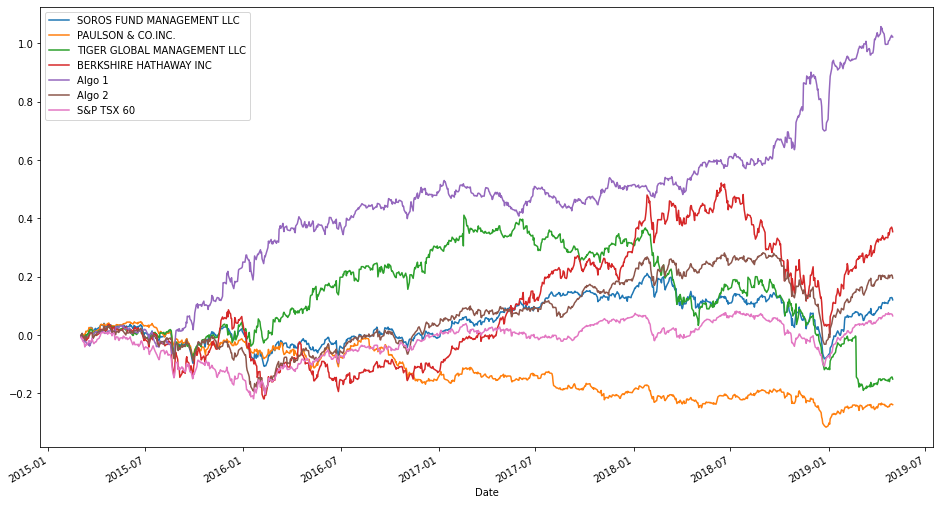

In [21]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1+combined_returns).cumprod() -1
# Plot cumulative returns
cumulative_returns.plot(figsize=(16,9))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

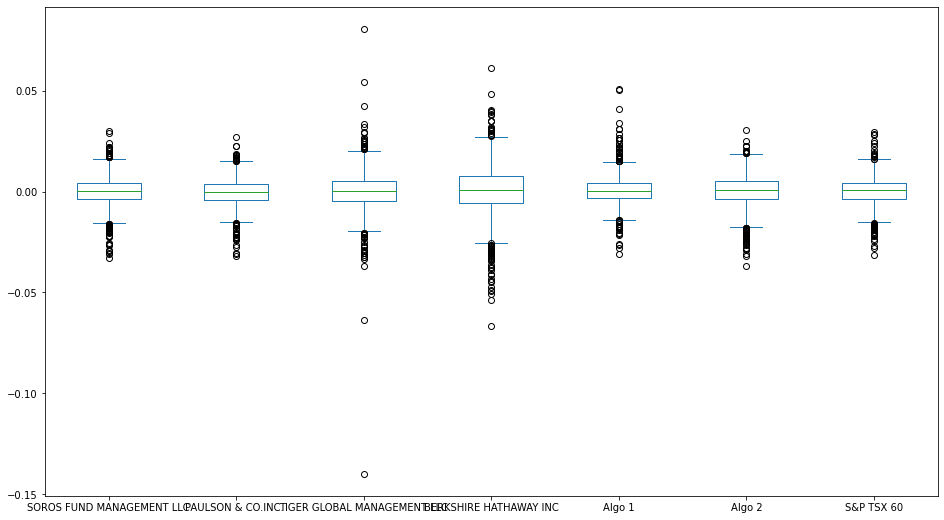

In [22]:
# Box plot to visually show risk
combined_returns.plot.box(figsize=(16,9))

### Calculate Standard Deviations

In [23]:
# Calculate the daily standard deviations of all portfolios
daily_std = combined_returns.std()
print(daily_std)

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
S&P TSX 60                     0.007034
dtype: float64


### Determine which portfolios are riskier than the S&P TSX 60

In [24]:
# Calculate  the daily standard deviation of S&P TSX 60
riskier_portfolios = daily_std[daily_std > daily_std["Algo 1"]]
# Determine which portfolios are riskier than the S&P TSX 60
print(riskier_portfolios)

SOROS FUND MANAGEMENT LLC      0.007828
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 2                         0.008326
dtype: float64


### Calculate the Annualized Standard Deviation

In [25]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
S&P TSX 60                     0.111664
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

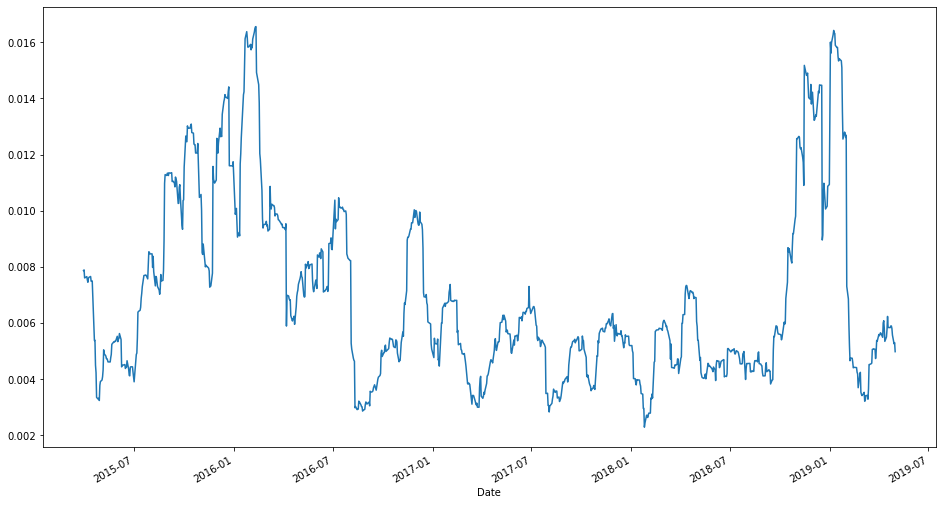

In [26]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window and Plot the rolling standard deviation
combined_returns["Algo 1"].rolling(window=21).std().plot(figsize=(16,9))

### Calculate and plot the correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P TSX 60,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


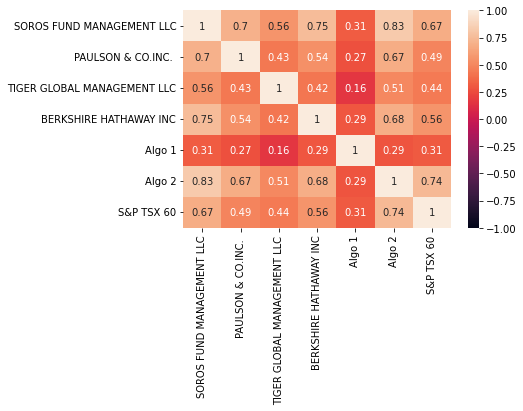

In [28]:
# Calculate the correlation
# Display de correlation matrix
import seaborn as sns
correlation = combined_returns.corr()
sns.heatmap(correlation, vmin=-1, vmax=1,annot=True,)
correlation

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [60]:
# Calculate covariance of a single portfolio
covariance = combined_returns['SOROS FUND MANAGEMENT LLC'].cov(combined_returns['Close'])
covariance

KeyError: 'Close'

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [35]:
# Calculate variance of S&P TSX
variance = combined_returns['BERKSHIRE HATHAWAY INC'].var()
variance

0.00016449386147845033

In [59]:
# Computing beta
BERK_beta = covariance / variance
BERK_beta

# Plot beta trend


NameError: name 'covariance' is not defined

<AxesSubplot:xlabel='Date'>

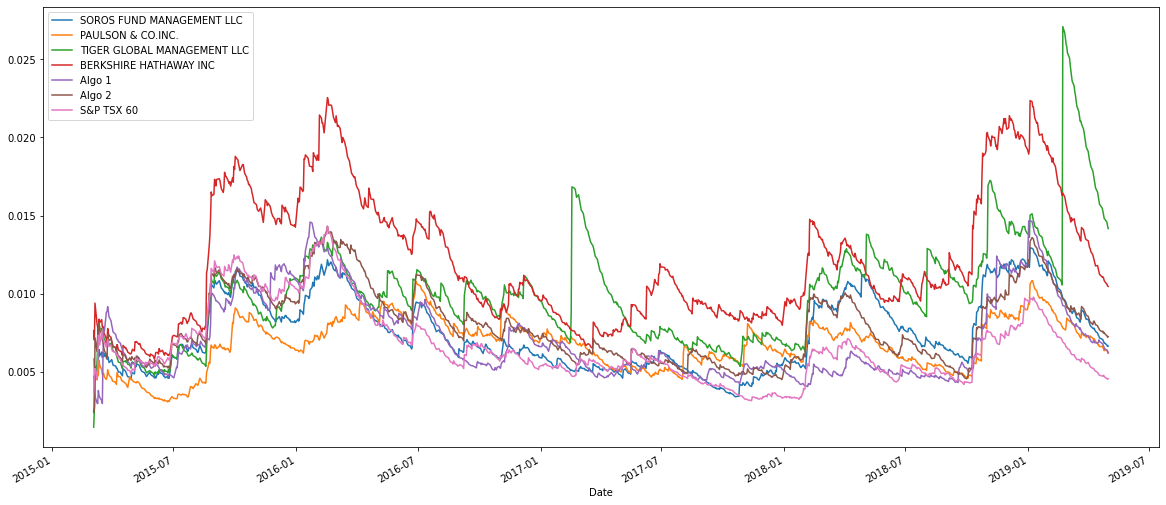

In [62]:
# Use `ewm` to calculate the rolling window
combined_returns.ewm(halflife=21).std().plot(figsize=(20,9))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [88]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_returns.mean() * 252) / (combined_returns.std() * np.sqrt(252))
sharpe_ratios.sort_values()

S&P TSX 60                    -0.648333
Algo 1                        -0.621840
Algo 2                        -0.218526
SOROS FUND MANAGEMENT LLC           NaN
PAULSON & CO.INC.                   NaN
TIGER GLOBAL MANAGEMENT LLC         NaN
BERKSHIRE HATHAWAY INC              NaN
dtype: float64

<AxesSubplot:>

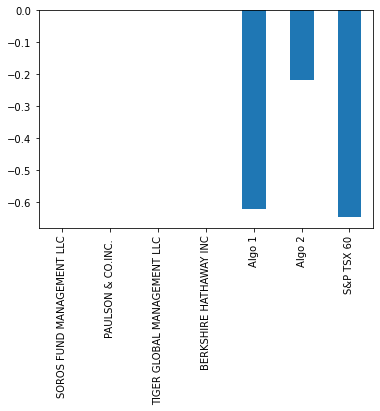

In [89]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar()

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Yes. Algorithmic Strategies outperform the market (S&P TSX 60) and the whales portfolios.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [90]:
# Reading data from 1st stock
combined1_df = None
tickers = ['aapl','tsla','goog']
for ticker in tickers:
    TICKER = ticker.upper()
    ticker_returns_csv = Path(f"l_historical.csv")
    ticker_df = pd.read_csv(ticker_returns_csv,index_col="Date", parse_dates=True)
    ticker_df.index.names = ["Date"]
    ticker_df.sort_index(inplace=True)
    ticker_df.drop(columns=['Symbol'],inplace=True)
    ticker_df.columns = [TICKER]
    ticker_df[TICKER] = ticker_df[TICKER].astype('float64').pct_change()
    combined1_df = pd.concat([combined_returns,ticker_df], axis="columns", join="inner")
    combined1_df.dropna(inplace=True)
    combined1_df.isnull().sum()

print(combined1_df.head())
print(combined1_df.tail())

            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2018-01-03                  -0.875244           -0.995240   
2018-01-04                  -1.677823          161.138593   
2018-01-05                   3.682912           -0.993528   
2018-01-08                  -1.286135           -6.862947   
2018-01-09                  12.246427           -1.131912   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC      Algo 1  \
Date                                                                          
2018-01-03                     1.515725               -1.011175   -4.198859   
2018-01-04                     0.416591               -0.330101   -1.382597   
2018-01-05                    -0.707152               24.381381 -117.483547   
2018-01-08                     5.061857               -0.928085   -1.012231   
2018-01-09                    -0.848731               -0.950029   -1.085311   

               Alg

In [91]:
# Reading data from 2nd stock
combined2_df = None
tickers = ['aapl','tsla','goog']
for ticker in tickers:
    TICKER = ticker.upper()
    ticker_returns_csv = Path(f"shop_historical.csv")
    ticker_df = pd.read_csv(ticker_returns_csv,index_col="Date", parse_dates=True)
    ticker_df.index.names = ["Date"]
    ticker_df.sort_index(inplace=True)
    ticker_df.drop(columns=['Symbol'],inplace=True)
    ticker_df.columns = [TICKER]
    ticker_df[TICKER] = ticker_df[TICKER].astype('float64').pct_change()
    combined2_df = pd.concat([combined_df,ticker_df], axis="columns", join="inner")
    combined2_df.dropna(inplace=True)
    combined2_df.isnull().sum()    
print(combined2_df.head())
print(combined2_df.tail())

                AAPL     TESLA      GOOG      GOOG
Date                                              
2018-01-03 -0.011703 -0.011703 -0.011703  0.023398
2018-01-04 -0.003715 -0.003715 -0.003715  0.017092
2018-01-05 -0.007924 -0.007924 -0.007924 -0.001455
2018-01-08 -0.009631 -0.009631 -0.009631  0.016392
2018-01-09 -0.000712 -0.000712 -0.000712 -0.011254
                AAPL     TESLA      GOOG      GOOG
Date                                              
2019-12-20  0.024441  0.024441  0.024441 -0.005503
2019-12-23 -0.013463 -0.013463 -0.013463 -0.003118
2019-12-24 -0.007773 -0.007773 -0.007773  0.026915
2019-12-27  0.004526  0.004526  0.004526  0.017834
2019-12-30 -0.008839 -0.008839 -0.008839 -0.031734


In [92]:
# Reading data from 3rd stock
combined3_df = None
tickers = ['aapl','tsla','goog']
for ticker in tickers:
    TICKER = ticker.upper()
    ticker_returns_csv = Path(f"otex_historical.csv")
    ticker_df = pd.read_csv(ticker_returns_csv,index_col="Date", parse_dates=True)
    ticker_df.index.names = ["Date"]
    ticker_df.sort_index(inplace=True)
    ticker_df.drop(columns=['Symbol'],inplace=True)
    ticker_df.columns = [TICKER]
    ticker_df[TICKER] = ticker_df[TICKER].astype('float64').pct_change()
    combined3_df = pd.concat([combined_df,ticker_df], axis="columns", join="inner")
    combined3_df.dropna(inplace=True)
    combined3_df.isnull().sum()    
print(combined3_df.head())
print(combined3_df.tail())

                AAPL     TESLA      GOOG      GOOG
Date                                              
2018-01-03 -0.011703 -0.011703 -0.011703 -0.011703
2018-01-04 -0.003715 -0.003715 -0.003715 -0.003715
2018-01-05 -0.007924 -0.007924 -0.007924 -0.007924
2018-01-08 -0.009631 -0.009631 -0.009631 -0.009631
2018-01-09 -0.000712 -0.000712 -0.000712 -0.000712
                AAPL     TESLA      GOOG      GOOG
Date                                              
2019-12-20  0.024441  0.024441  0.024441  0.024441
2019-12-23 -0.013463 -0.013463 -0.013463 -0.013463
2019-12-24 -0.007773 -0.007773 -0.007773 -0.007773
2019-12-27  0.004526  0.004526  0.004526  0.004526
2019-12-30 -0.008839 -0.008839 -0.008839 -0.008839


In [93]:
# Combine all stocks in a single DataFrame
combined_returns1 = pd.concat([combined1_df,combined2_df,combined3_df], axis="columns", join="inner")
combined_returns1.head()

,AAPL,TESLA,GOOG,GOOG,AAPL,TESLA,GOOG,GOOG,AAPL,TESLA,GOOG,GOOG
Date,,,,,,,,,,,,
2018-01-03,-0.011703,-0.011703,-0.011703,-0.010002,-0.011703,-0.011703,-0.011703,0.023398,-0.011703,-0.011703,-0.011703,-0.011703
2018-01-04,-0.003715,-0.003715,-0.003715,0.000174,-0.003715,-0.003715,-0.003715,0.017092,-0.003715,-0.003715,-0.003715,-0.003715
2018-01-05,-0.007924,-0.007924,-0.007924,0.000000,-0.007924,-0.007924,-0.007924,-0.001455,-0.007924,-0.007924,-0.007924,-0.007924
2018-01-08,-0.009631,-0.009631,-0.009631,-0.009753,-0.009631,-0.009631,-0.009631,0.016392,-0.009631,-0.009631,-0.009631,-0.009631
2018-01-09,-0.000712,-0.000712,-0.000712,0.008969,-0.000712,-0.000712,-0.000712,-0.011254,-0.000712,-0.000712,-0.000712,-0.000712


In [94]:
# Calculate daily returns
combined_returns2= combined_returns1.pct_change()
combined_returns2.head()
# Drop NAs
combined_returns2.isnull().sum()
# Display sample data
combined_returns2.dropna(inplace=True)

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [97]:
# Set weights
weights = [1/3, 1/3, 1/3]
# Calculate portfolio return
# Display sample data
weighted_returns = combined_returns2.dot(weights)
weighted_returns.columns = ['Custom']
print(weighted_returns.columns)
print(weighted_returns.head())

ValueError: Dot product shape mismatch, (1012, 7) vs (3,)

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [98]:
# Join your returns DataFrame to the original returns DataFrame
new_combined_df = pd.concat([combined_returns,weighted_returns], axis="columns", join="inner")
new_combined_df.head()

NameError: name 'weighted_returns' is not defined

In [99]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
new_combined_df.dropna(inplace=True)
print(new_combined_df.tail())

NameError: name 'new_combined_df' is not defined

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [100]:
# Calculate the annualized `std`
new_annualisedrisk = new_combined_df.std()
print(new_annualisedrisk.sort_values())

NameError: name 'new_combined_df' is not defined

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

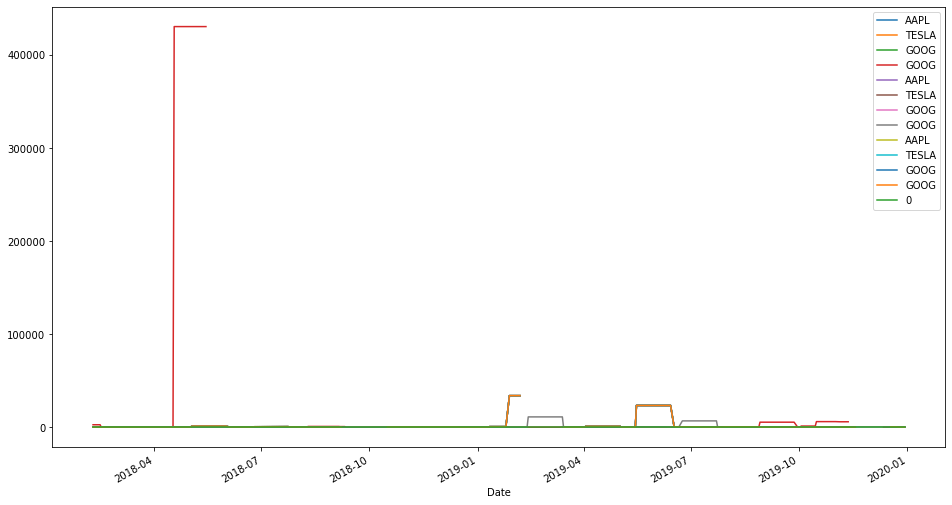

In [116]:
# Calculate rolling standard deviation
new_combined_df.rolling(window=21).std().plot(figsize=(16,9))
# Plot rolling standard deviation


### Calculate and plot the correlation

,AAPL,TESLA,GOOG,GOOG,AAPL,TESLA,GOOG,GOOG,AAPL,TESLA,GOOG,GOOG,0
AAPL,1.000000,1.000000,1.000000,-0.003092,1.000000,1.000000,1.000000,0.002492,1.000000,1.000000,1.000000,1.000000,-0.002323
TESLA,1.000000,1.000000,1.000000,-0.003092,1.000000,1.000000,1.000000,0.002492,1.000000,1.000000,1.000000,1.000000,-0.002323
GOOG,1.000000,1.000000,1.000000,-0.003092,1.000000,1.000000,1.000000,0.002492,1.000000,1.000000,1.000000,1.000000,-0.002323
GOOG,-0.003092,-0.003092,-0.003092,1.000000,-0.003092,-0.003092,-0.003092,0.002765,-0.003092,-0.003092,-0.003092,-0.003092,0.012188
AAPL,1.000000,1.000000,1.000000,-0.003092,1.000000,1.000000,1.000000,0.002492,1.000000,1.000000,1.000000,1.000000,-0.002323
TESLA,1.000000,1.000000,1.000000,-0.003092,1.000000,1.000000,1.000000,0.002492,1.000000,1.000000,1.000000,1.000000,-0.002323
GOOG,1.000000,1.000000,1.000000,-0.003092,1.000000,1.000000,1.000000,0.002492,1.000000,1.000000,1.000000,1.000000,-0.002323
GOOG,0.002492,0.002492,0.002492,0.002765,0.002492,0.002492,0.002492,1.000000,0.002492,0.002492,0.002492,0.002492,-0.018526
AAPL,1.000000,1.000000,1.000000,-0.003092,1.000000,1.000000,1.000000,0.002492,1.000000,1.000000,1.000000,1.000000,-0.002323
TESLA,1.000000,1.000000,1.000000,-0.003092,1.000000,1.000000,1.000000,0.002492,1.000000,1.000000,1.000000,1.000000,-0.002323


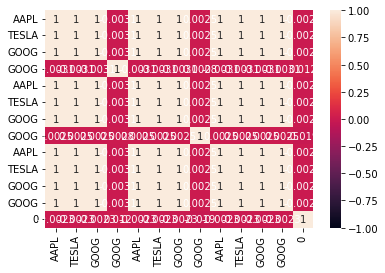

In [118]:
# Calculate and plot the correlation
import seaborn as sns
correlation = new_combined_df.corr()
sns.heatmap(correlation, vmin=-1, vmax=1,annot=True,)
correlation

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [101]:
# Calculate and plot Beta
BERK_beta = covariance / variance
BERK_beta

NameError: name 'covariance' is not defined

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [120]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios = (new_combined_df.mean() * 252) / (new_combined_df.std() * np.sqrt(252))
sharpe_ratios.sort_values()

GOOG    -0.964569
0        0.836920
AAPL          NaN
TESLA         NaN
GOOG          NaN
GOOG          NaN
AAPL          NaN
TESLA         NaN
GOOG          NaN
AAPL          NaN
TESLA         NaN
GOOG          NaN
GOOG          NaN
dtype: float64

<AxesSubplot:>

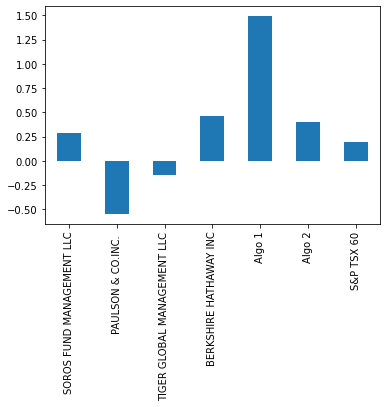

In [ ]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar()

### How does your portfolio do?

Write your answer here!